# Inference with faster-RCNN
This notebook demonstrates a standardized pipeline for utilizing pre-trained models (faster-RCNN) and their associated weights from the Torch Hub.

## Resources
- [Torch Vision Model](https://pytorch.org/vision/stable/models.html) : List of available models and weights, pretrain and 
- [Torch Official Tutorial](https://pytorch.org/hub/pytorch_vision_resnet/) : Tutorial on basic pytorch.
- [Torch Official SSD](https://pytorch.org/vision/main/models/ssd.html)
- [Nvidia Hub implementation](https://pytorch.org/hub/nvidia_deeplearningexamples_ssd/)

# Data

In [1]:
import urllib
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# Summary 
## One Cell scripts for inference on model and inference
Individuals who possess the ability to comprehend and follow the scripts presented in the subsequent cell may forgo the explanatory sections, as these sections provide a more detailed analysis of the aforementioned cells.

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /home/howt/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:06<00:00, 27.2MB/s] 
/home/howt/miniforge3/envs/py311cv/lib/python3.11/site-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


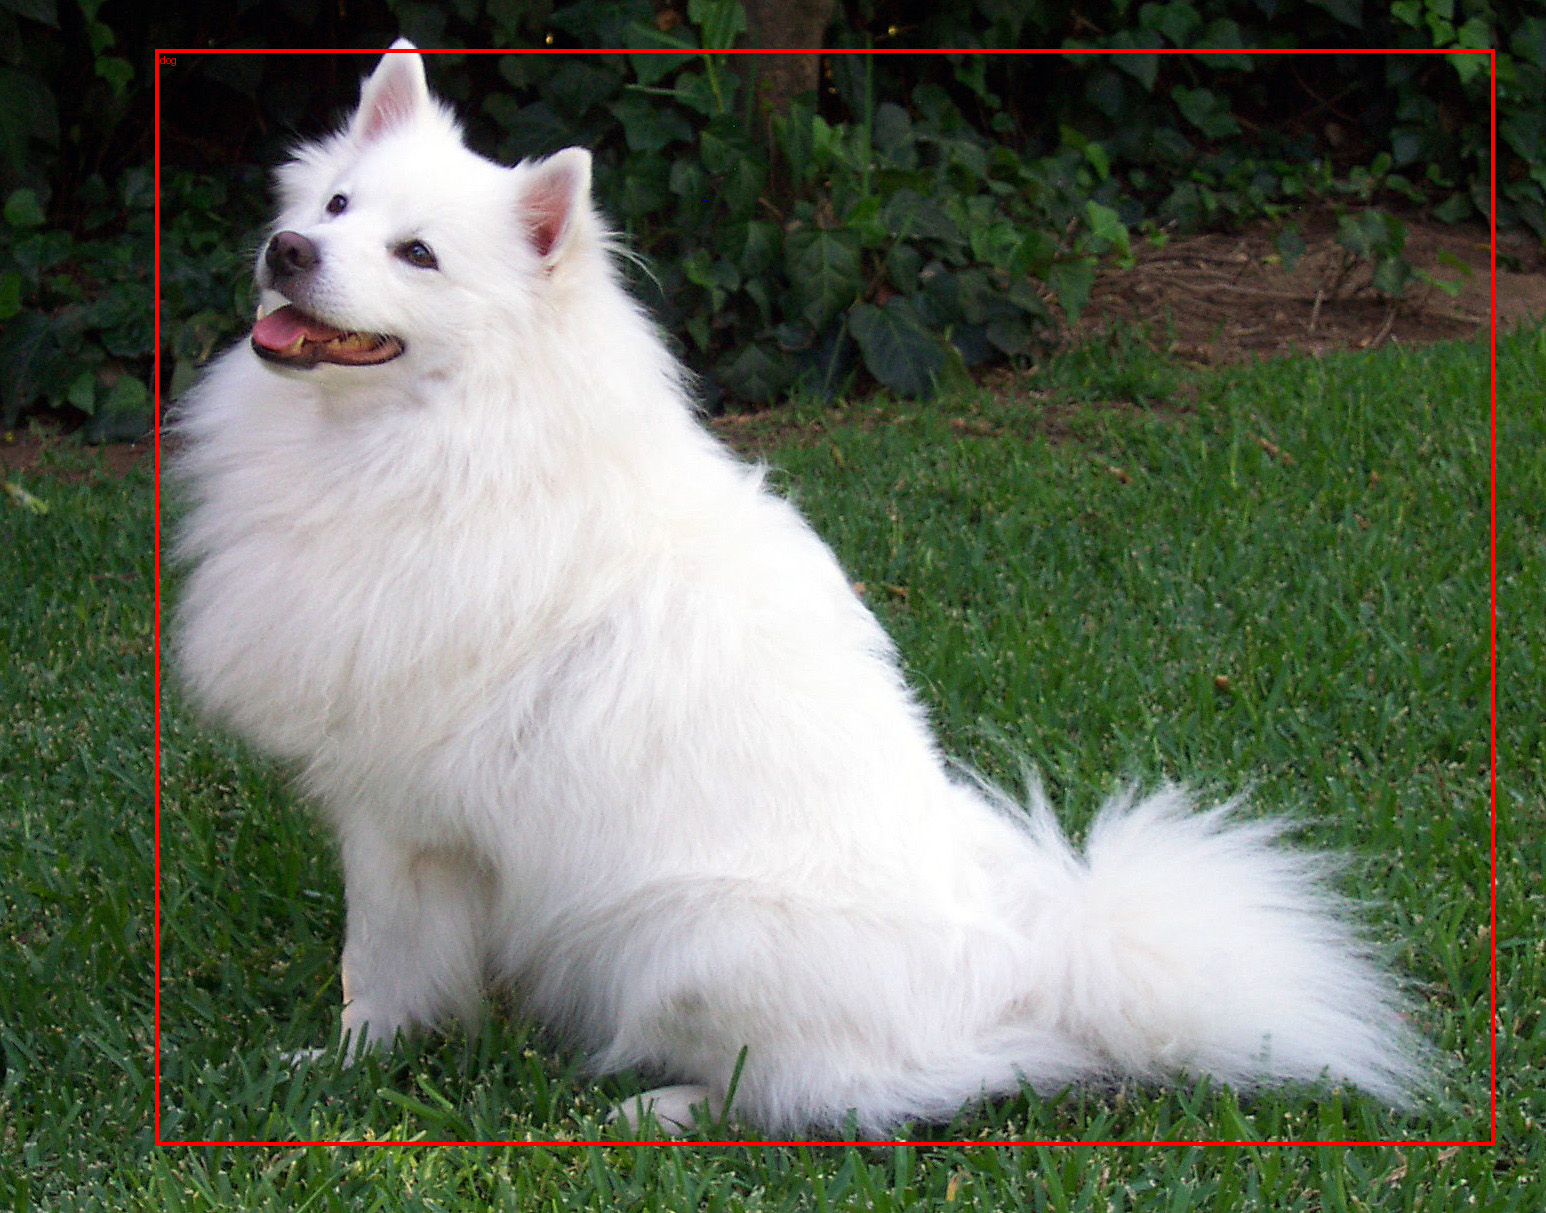

In [2]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
import torch

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Load data
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

img = read_image("dog.jpg")

# Step 3: Apply preprocessing transforms
preprocess = weights.transforms()
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
with torch.no_grad():
    prediction = model(batch)[0]
    
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()

# Breakdown

The PyTorch vision library offers a selected of pre-trained R-CNN object detection models, as documented in the official PyTorch documentation: https://pytorch.org/vision/stable/models.html. (Please refer to the object detection section)

## 1. Model Loading - R-CNN family
The loaded model leverages a pre-trained R-CNN architecture built upon a Resnet50 convolutional neural network (CNN). This model falls under the category of two-stage object detectors, with a backbone of:
- Image classification models (resnet50)

And also other techniques for
- selective search + regions pooling
- And another layers of localizing and bounding box.


In [3]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

## 2. Data Loading

In [4]:
from torchvision.io.image import read_image
# Load an example image
image_path = 'dog.jpg'
image = read_image(image_path)

## 3. Preprocess the image
Define a transformation pipeline (adjust based on model requirements). 
 - We would allow a null pre-processing (skip) here

In [5]:
# Step 3: Apply preprocessing transforms
preprocess = weights.transforms()
batch = [preprocess(img)]

# Step 4: Model Inference

In [6]:
# Step 4: Use the model and visualize the prediction
with torch.no_grad():
    prediction = model(batch)

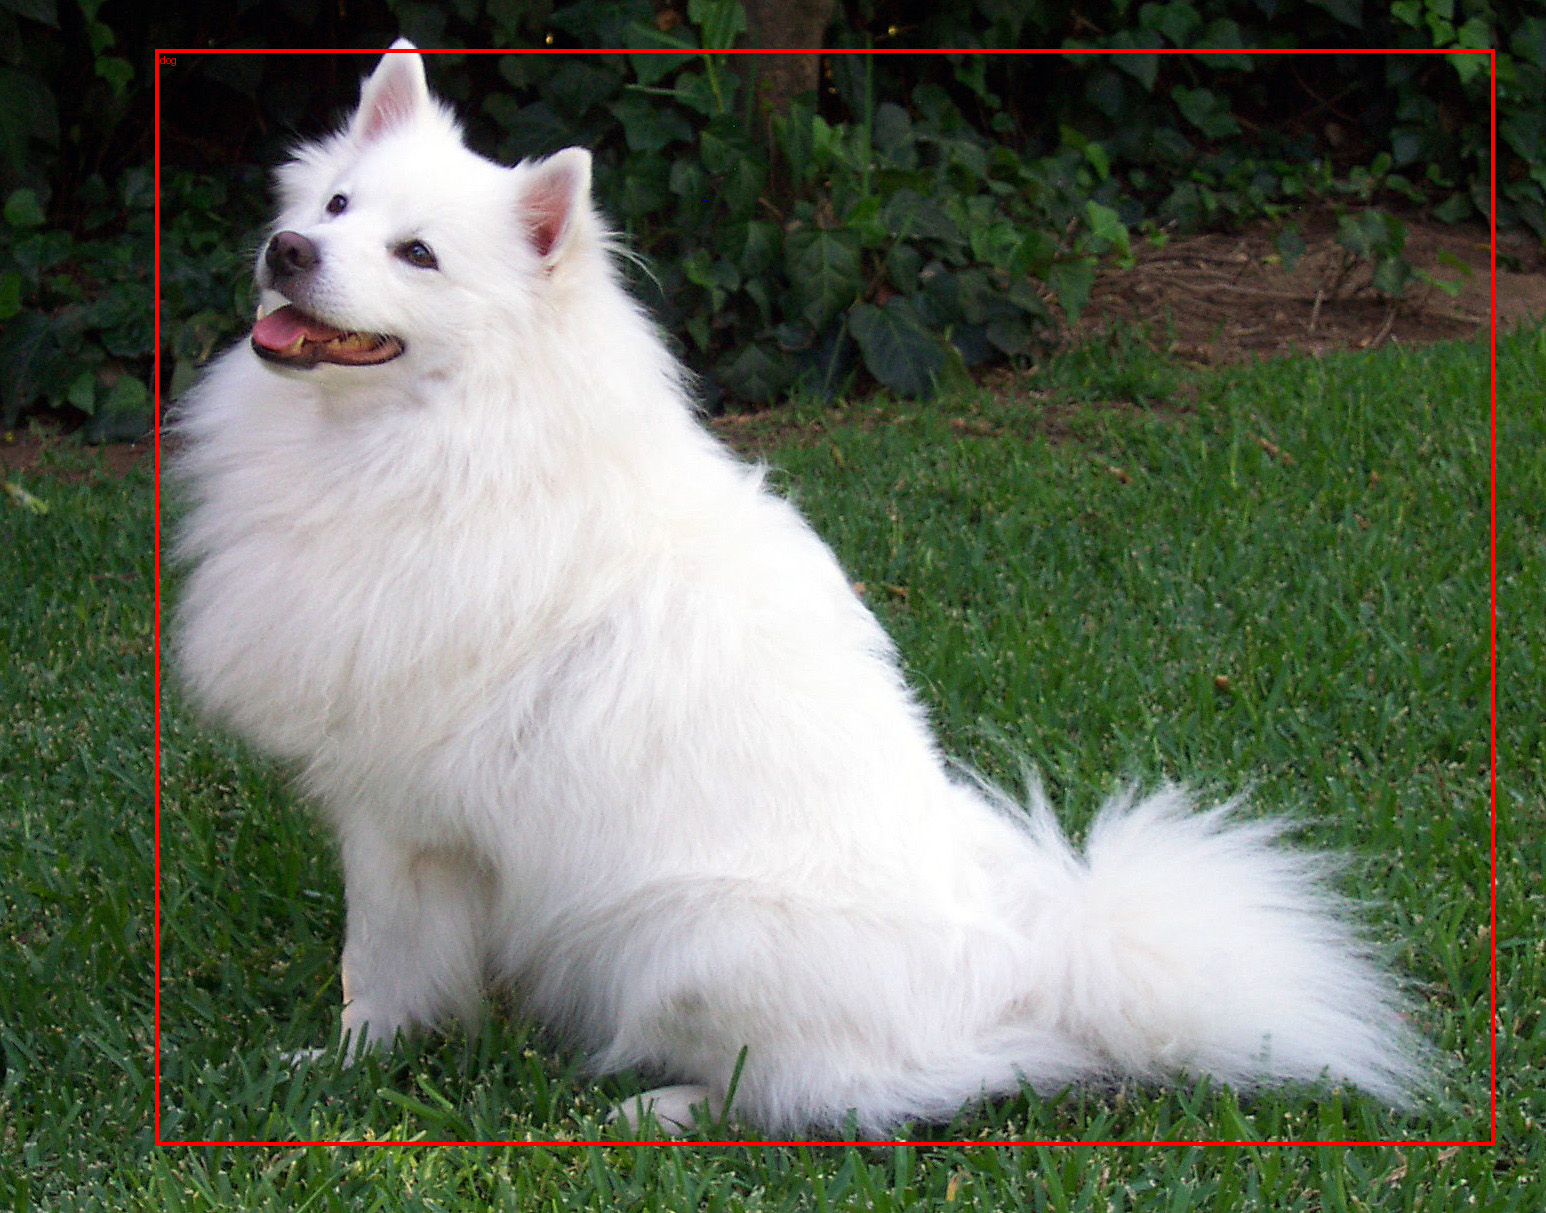

In [7]:

# Step 5: Visualize the 1st prediction
prediction_0 = prediction[0]
labels = [weights.meta["categories"][i] for i in prediction_0["labels"]]
box = draw_bounding_boxes(img, boxes=prediction_0["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()